This is a data of book, gifts, games store

# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split as tts
plt.style.use('ggplot')

# Reading the File

In [2]:
df = pd.read_csv('purchases.txt', sep='\t', header = None)
df.head()

,0,1,2
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


# Renaming the Columns

In [3]:
# Renaming the columns
df.columns = ['cust_id', 'purchase', 'date']
df.head()

,cust_id,purchase,date
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [4]:
# Changing customer ID data type from Integer to String
df['cust_id'] = df.cust_id.astype('str')

In [5]:
# Formatting Dates & Converting from String to Date Format
df.date = pd.to_datetime(df.date, format= '%Y-%m-%d')

In [6]:
df.head()

,cust_id,purchase,date
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [7]:
# Getting year column
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,cust_id,purchase,date,year
0,760,25.0,2009-11-06,2009
1,860,50.0,2012-09-28,2012
2,1200,100.0,2005-10-25,2005
3,1420,50.0,2009-07-09,2009
4,1940,70.0,2013-01-25,2013


In [8]:
df.describe()

,purchase,year
count,51243.000000,51243.000000
mean,62.337195,2010.869699
std,156.606801,2.883072
min,5.000000,2005.000000
25%,25.000000,2009.000000
50%,30.000000,2011.000000
75%,60.000000,2013.000000
max,4500.000000,2015.000000


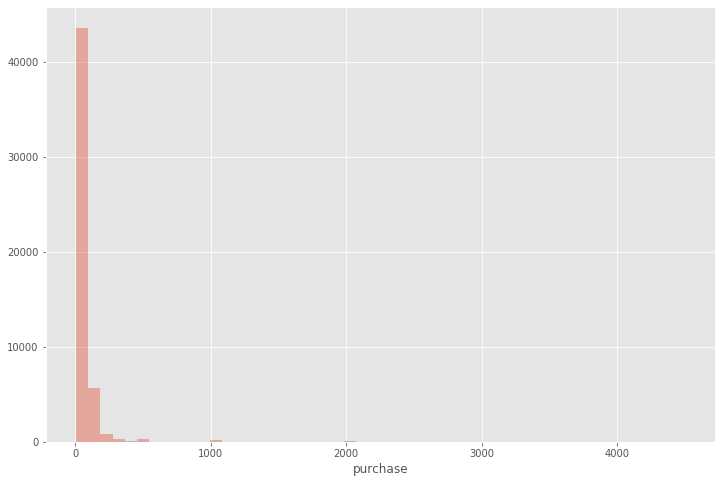

In [9]:
plt.figure(figsize = (12,8))
sns.distplot(df.purchase, kde = False)

# Year-Wise Foot Fall

In [10]:
df.groupby('year').agg({'year':['count']})

,year
,count
year,
2005,1470
2006,2182
2007,4674
2008,4331
2009,5054
2010,4939
2011,4785
2012,5960


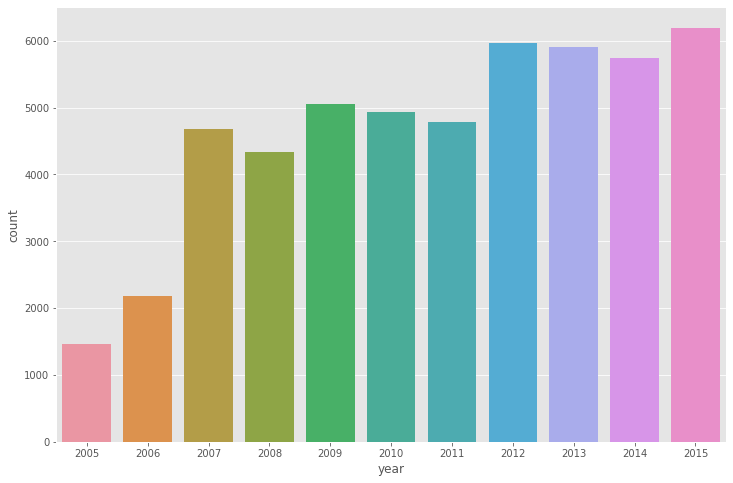

In [11]:
plt.figure(figsize = (12,8))
sns.countplot(df.year)

# Year Wise Puchase Amount Average

In [12]:
df.groupby('year').agg({'purchase':'mean'})

,purchase
year,
2005,55.826122
2006,52.250454
2007,49.264014
2008,53.071780
2009,50.745253
2010,58.740012
2011,63.519300
2012,62.913312
2013,67.931357


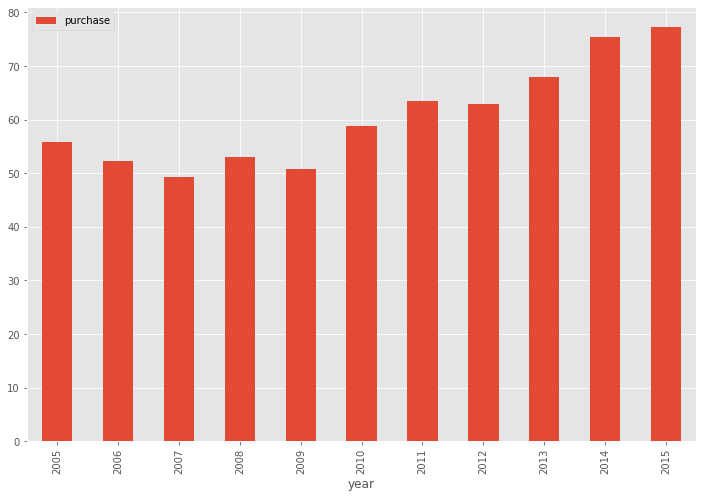

In [13]:
df.groupby('year').agg({'purchase':'mean'}).plot(kind ='bar',figsize = (12,8))

# Year Wise Purchase Amount Total

In [14]:
df.groupby('year').agg({'purchase':['sum']})

,purchase
,sum
year,
2005,82064.40
2006,114010.49
2007,230260.00
2008,229853.88
2009,256466.51
2010,290116.92
2011,303939.85
2012,374963.34


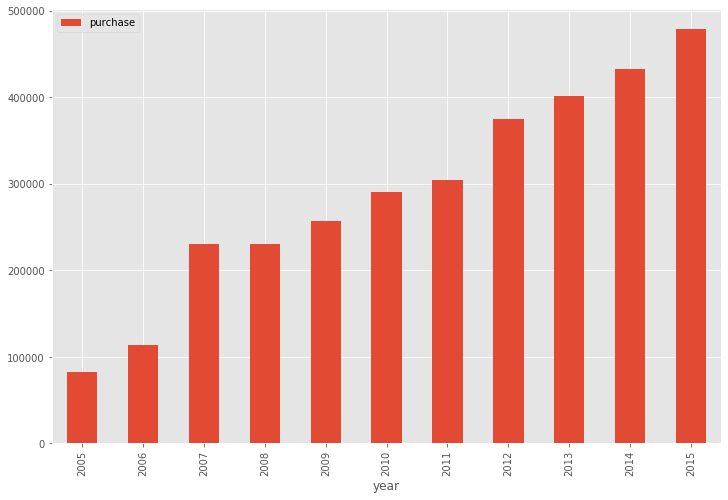

In [15]:
df.groupby('year').agg({'purchase':'sum'}).plot(kind='bar', figsize = (12,8))

**Last Date in Dataset**

In [16]:
end_date = df.date.max()
end_date

Timestamp('2015-12-31 00:00:00')

**Calculating Days Since Last Purchase**

In [17]:
df['days_since'] = df.date.apply(lambda x: (end_date - x).days + 1)

In [18]:
df.describe()

,purchase,year,days_since
count,51243.000000,51243.000000,51243.000000
mean,62.337195,2010.869699,1631.939309
std,156.606801,2.883072,1061.076889
min,5.000000,2005.000000,1.000000
25%,25.000000,2009.000000,733.000000
50%,30.000000,2011.000000,1500.000000
75%,60.000000,2013.000000,2540.000000
max,4500.000000,2015.000000,4016.000000


In [19]:
df.head()

,cust_id,purchase,date,year,days_since
0,760,25.0,2009-11-06,2009,2247
1,860,50.0,2012-09-28,2012,1190
2,1200,100.0,2005-10-25,2005,3720
3,1420,50.0,2009-07-09,2009,2367
4,1940,70.0,2013-01-25,2013,1071


# Grouping the Dataset based on Customer ID

In [20]:
customer = df.groupby('cust_id').agg({'days_since':'min', 'cust_id':'count', 'purchase':'mean'})
customer.columns = ['recency', 'frequency', 'amount']
customer.head()

,recency,frequency,amount
cust_id,,,
10,3829,1,30.000000
1000,1120,2,22.500000
100000,2072,2,35.000000
100010,413,7,27.857143
100020,2750,1,30.000000


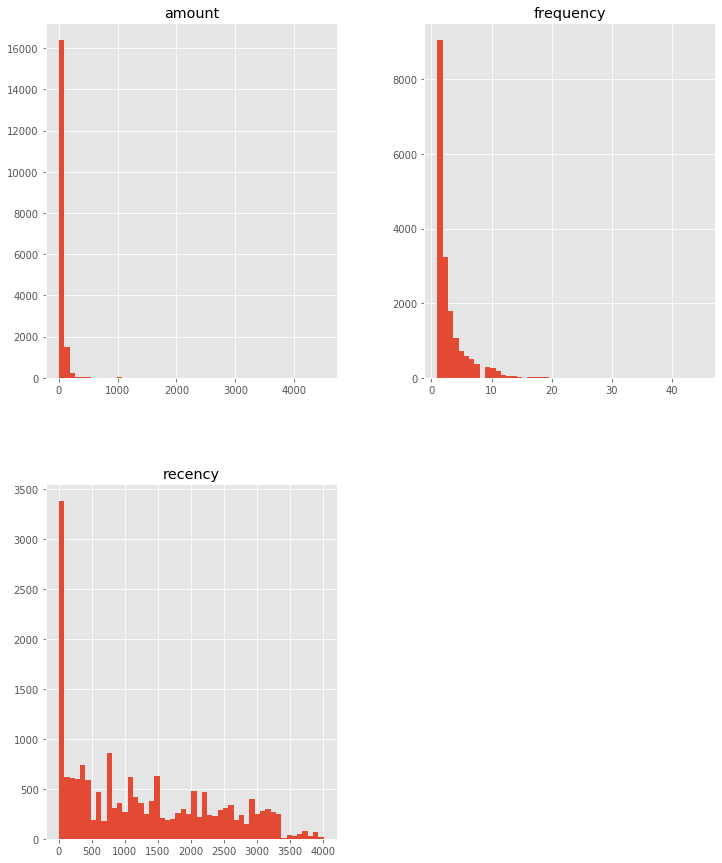

In [23]:
customer.hist(bins = 50, figsize = (12,15))
plt.show()

**Creating a copy of DataFrame**

In [24]:
cust = customer.copy()

**Adding a column of log of amount as it is highly skewed**

In [25]:
cust['log_amt'] = np.log(cust.amount)
cust.head()

,recency,frequency,amount,log_amt
cust_id,,,,
10,3829,1,30.000000,3.401197
1000,1120,2,22.500000,3.113515
100000,2072,2,35.000000,3.555348
100010,413,7,27.857143,3.327089
100020,2750,1,30.000000,3.401197


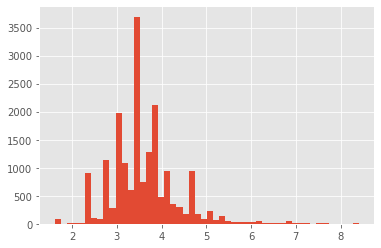

In [28]:
cust['log_amt'].hist(bins= 50)

**Data has become somewhat Normalized**

In [29]:
cust.index

Index(['10', '1000', '100000', '100010', '100020', '100030', '100040',
       '100050', '100060', '100070',
       ...
       '99880', '99890', '99900', '99930', '99940', '99950', '99960', '99970',
       '99980', '99990'],
      dtype='object', name='cust_id', length=18417)

# Standardizing the Data

In [30]:
scaler = StandardScaler()
scaled_cust = scaler.fit_transform(cust)
scaled_cust = pd.DataFrame(scaled_cust, columns=cust.columns, index=cust.index)
scaled_cust.head()

,recency,frequency,amount,log_amt
cust_id,,,,
10,2.382043,-0.606909,-0.180058,-0.235802
1000,-0.123023,-0.266403,-0.228647,-0.610597
100000,0.757311,-0.266403,-0.147665,-0.034973
100010,-0.776800,1.436125,-0.193940,-0.332350
100020,1.384271,-0.606909,-0.180058,-0.235802


# Using K-Means Algorithm for Clustering

In [31]:
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=4)

In [32]:
kmeans.fit(scaled_cust.drop('amount', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=4, tol=0.0001, verbose=0)

In [33]:
kmeans.cluster_centers_

array([[ 1.22254454, -0.42949768, -0.40187465],
       [-0.55382373, -0.26564316, -0.24507121],
       [-0.40299026, -0.05507611,  1.79456306],
       [-0.86878908,  2.18477453,  0.18875861]])

In [34]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3])

# Assigning Segments to Each Customer

In [35]:
cust['segments'] = kmeans.labels_
cust.head()

,recency,frequency,amount,log_amt,segments
cust_id,,,,,
10,3829,1,30.000000,3.401197,0
1000,1120,2,22.500000,3.113515,1
100000,2072,2,35.000000,3.555348,0
100010,413,7,27.857143,3.327089,3
100020,2750,1,30.000000,3.401197,0


In [36]:
cust.drop('log_amt', axis =1).to_csv('Case1.csv')

# Computing Mean of Every Segment

In [38]:
case1_cross_tab = cust.groupby('segments').agg({'recency':['mean'],
                             'frequency':['mean'],'amount':['mean'], 'segments':['count']})

In [40]:
case1_cross_tab.columns = ['recency_mean', 'frequency_mean', 'amount_mean', 'segment_count']
case1_cross_tab

,recency_mean,frequency_mean,amount_mean,segment_count
segments,,,,
0,2575.107972,1.521023,30.639246,5946
1,654.128208,2.002232,33.145877,8065
2,817.240800,2.620627,228.142727,2201
3,313.521995,9.198639,51.124180,2205


In [41]:
case1_cross_tab.to_csv('case1_cross_tab.csv')

# Problem Statement 2

In [42]:
cust2 = customer.copy()

In [43]:
cust2.head()

,recency,frequency,amount
cust_id,,,
10,3829,1,30.000000
1000,1120,2,22.500000
100000,2072,2,35.000000
100010,413,7,27.857143
100020,2750,1,30.000000


In [47]:
print(cust2.frequency.quantile(0.5), cust2.frequency.quantile(0.8))

2.0 4.0


# Creating Segments Based on Quantiles

In [48]:
def freq(x):
    if (x<=2):
        return 'frequency_low'
    elif (x<=4):
        return 'frequency_medium'
    else:
        return 'frequency_high'

In [49]:
cust2['recency_segment'] = pd.qcut(cust2.recency, 3 , 
                                   labels = ['recency_low', 'recency_medium', 'recency_high'], duplicates = 'drop')
cust2['amount_segment'] = pd.qcut(cust2.amount, 3 , 
                                  labels = ['amount_low', 'amount_medium', 'amount_high'], duplicates = 'drop')
cust2['frequency_segment'] = cust2.frequency.apply(lambda x: freq(x))

In [50]:
cust2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18417 entries, 10 to 99990
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   recency            18417 non-null  int64   
 1   frequency          18417 non-null  int64   
 2   amount             18417 non-null  float64 
 3   recency_segment    18417 non-null  category
 4   amount_segment     18417 non-null  category
 5   frequency_segment  18417 non-null  object  
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 755.6+ KB


In [52]:
cust2['frequency_segment'] = pd.Categorical(cust2['frequency_segment'].values, 
                                            categories=['frequency_low', 'frequency_medium', 'frequency_high'],ordered=True)
cust2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18417 entries, 10 to 99990
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   recency            18417 non-null  int64   
 1   frequency          18417 non-null  int64   
 2   amount             18417 non-null  float64 
 3   recency_segment    18417 non-null  category
 4   amount_segment     18417 non-null  category
 5   frequency_segment  18417 non-null  category
dtypes: category(3), float64(1), int64(2)
memory usage: 629.8+ KB


In [53]:
cust2.describe(include='all')

,recency,frequency,amount,recency_segment,amount_segment,frequency_segment
count,18417.000000,18417.000000,18417.000000,18417,18417,18417
unique,NaN,NaN,NaN,3,3,3
top,NaN,NaN,NaN,recency_low,amount_medium,frequency_low
freq,NaN,NaN,NaN,6171,6295,12293
mean,1253.037900,2.782375,57.792985,NaN,NaN,NaN
std,1081.437868,2.936888,154.360109,NaN,NaN,NaN
min,1.000000,1.000000,5.000000,NaN,NaN,NaN
25%,244.000000,1.000000,21.666667,NaN,NaN,NaN
50%,1070.000000,2.000000,30.000000,NaN,NaN,NaN
75%,2130.000000,3.000000,50.000000,NaN,NaN,NaN


# Creating Cross Tab Based on Segmentation

In [54]:
cross_table = cust2.groupby(['recency_segment','frequency_segment', 'amount_segment'], as_index = False).agg({'recency':['count','mean'],'frequency':['mean'],  'amount':['mean']})

In [57]:
# Renaming Columns
cross_table.columns = ['recency_segment','frequency_segment','amount_segment','segment_count', 'recency_mean', 'frequency_mean', 'amount_mean']

In [58]:
cross_table

,recency_segment,frequency_segment,amount_segment,segment_count,recency_mean,frequency_mean,amount_mean
0,recency_low,frequency_low,amount_low,623,146.497592,1.263242,17.961172
1,recency_low,frequency_low,amount_medium,974,141.143737,1.347023,33.877310
2,recency_low,frequency_low,amount_high,1015,144.352709,1.369458,146.119172
3,recency_low,frequency_medium,amount_low,324,160.472222,3.475309,19.993930
4,recency_low,frequency_medium,amount_medium,432,143.451389,3.412037,34.626736
5,recency_low,frequency_medium,amount_high,511,136.536204,3.407045,118.071466
6,recency_low,frequency_high,amount_low,497,131.507042,8.613682,20.488344
7,recency_low,frequency_high,amount_medium,736,128.047554,8.524457,34.934196
8,recency_low,frequency_high,amount_high,1059,112.742210,8.355996,122.664979
9,recency_medium,frequency_low,amount_low,1358,1080.818851,1.282032,16.768060


In [59]:
cross_table.to_csv('case2_cross_tab.csv')

In [ ]:
cust.recency.plot(kind='hist', linewidth = 0.5, edgecolor ='white')

In [ ]:
cust.frequency.plot(kind='hist', linewidth = 0.5, edgecolor ='white', bins = 10, figsize = (12,8))

In [ ]:
cust.amount.plot(kind='hist', linewidth = 0.5, edgecolor ='white', bins = 100
                 , figsize = (12,8))

In [ ]:
cust['log_amt'] = np.log(cust.amount)

In [ ]:
cust['log_amt'].plot(kind='hist', linewidth = 0.5, edgecolor ='white', bins = 30
                 , figsize = (12,8))

In [ ]:
cust.mean()

In [ ]:
cust.std()

In [ ]:
scaled = (cust-cust.mean())/cust.std()

In [ ]:
scaled.shape

In [ ]:
import random

In [ ]:
cust.columns

In [ ]:
# import plotly.figure_factory as ff

# fig = ff.create_dendrogram(scaled[['recency', 'frequency','log_amt']], color_threshold=1.5)
# fig.update_layout(width=800, height=500)
# fig.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering as agc

In [ ]:
ag = agc(n_clusters=9)

In [ ]:
ag.fit(scaled[['recency', 'frequency','log_amt']])

In [ ]:
cust['cluster'] = ag.labels_

In [ ]:
cust.head()

In [ ]:
ag.labels_

In [ ]:
cust.cluster = cust.cluster.astype('str')

In [ ]:
cust.info()

In [ ]:
cust.groupby('cluster').agg({'recency':['mean'],
                             'frequency':['mean'],'amount':['mean'], 'cluster':['count']})

In [ ]:
{'5': 'not a good segment', '4': 'good segment to retain', '0':'to bring back','3': 'good to retain'}

In [ ]:
cust.groupby('cluster').agg({'recency':['count']})

# new data drame

In [ ]:
cust2 = df.groupby('cust_id').agg({'days_since':['min', 'max'], 'cust_id':['count'], 'purchase':['mean']})

In [ ]:
cust2.head()

In [ ]:
cust2.columns = ['recency', 'first_purchase', 'frequency', 'amount']
cust2.head()

In [ ]:
from pandasql import sqldf

In [ ]:
sqldf('select cust_id, min(days_since) as recency, max(days_since) as first_purchase, count(*) as frequency, avg(purchase) as amount from df group by cust_id')

In [ ]:
def segment(x):
    if (x<=365):
        return 'active'
    elif ((x >365) & (x<=365*2)):
        return 'warm'
    elif ((x > 365*2) & (x<=365*3)):
        return 'cold'
    elif (x>365*3):
        return 'inactive'

In [ ]:
def segment2(recency, first_purchase, amount):
    if (recency<=365):
        if (first_purchase<=365):
            return 'new active'
        elif(amount<100):
            return 'active low value'
        elif (amount>=100):
            return 'active high value'
    elif ((recency >365) & (recency<=365*2)):
        if (first_purchase<=362*2):
            return 'new warm'
        elif(amount<100):
            return 'warm low value'
        elif (amount>=100):
            return 'warm high value'
    elif ((recency > 365*2) & (recency<=365*3)):
        return 'cold'
    elif (recency>365*3):
        return 'inactive'

In [ ]:
cust2['label'] = cust2.recency.apply(segment)

In [ ]:
cust2.groupby('label').count().sum()

In [ ]:
cust2.shape

In [ ]:
cust2.groupby('label').agg({'label':'count'})

In [ ]:
cust2['segment_n'] = cust2[['recency', 'first_purchase', 'amount']].apply(lambda x: segment2(x.recency, x.first_purchase, x.amount), axis =1)

In [ ]:
grp = cust2.groupby(['label', 'segment_n']).agg({'label':['count'], 'amount':['mean'], 'recency':'mean'})

In [ ]:
grp

In [ ]:
(grp.iloc[:,0]/ 184.17).plot(kind='barh')

In [ ]:
# frequecy is samoe for high value and low value